### 연습문제 11-1

In [1]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')

data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [30]:
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)
y = data[['Rented Bike Count']].to_numpy()

In [31]:
# binarize the seasons
data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,No Holiday,Yes


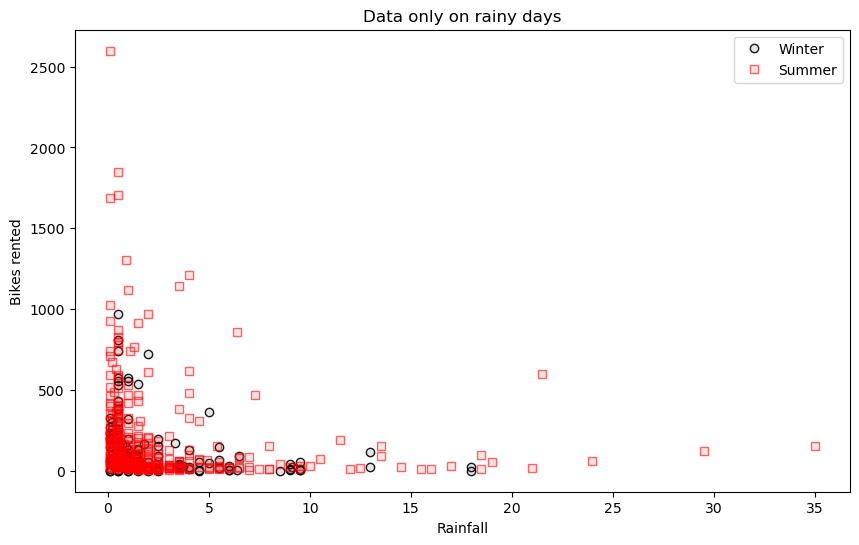

In [32]:
# repeat excluding zeros in rainfall
import matplotlib.pyplot as plt

desmat_norain = desmat[desmat[:,0]>0,:]
y_norain = y[desmat[:,0]>0,:]

# plot the data
plt.figure(figsize=(10,6))

# separately for autumn/winter and spring/summer
plt.plot(desmat_norain[desmat_norain[:,1]==0,0],y_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(desmat_norain[desmat_norain[:,1]==1,0],y_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.title('Data only on rainy days')
plt.legend()
plt.show()

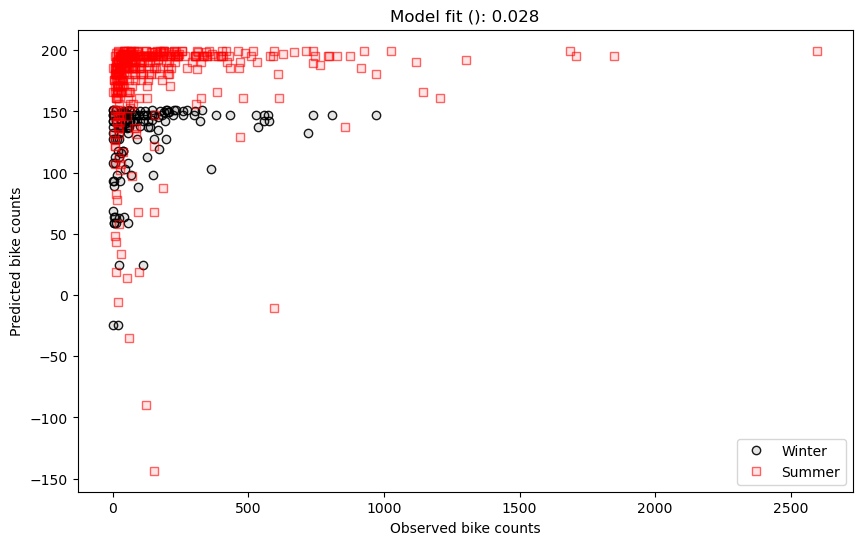

In [33]:
# run the regression (using np's least-squares)
beta_norain = np.linalg.lstsq(desmat_norain,y_norain,rcond=None)


# predicted data
yHat_norain = desmat_norain @ beta_norain[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y_norain.T,yHat_norain.T)[0,1]**2



## plot some results.
plt.figure(figsize=(10,6))
plt.plot(y_norain[desmat_norain[:,1]==0],yHat_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y_norain[desmat_norain[:,1]==1],yHat_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit (): {modelfit:.3f}')
plt.show()

### 연습 문제 11-2

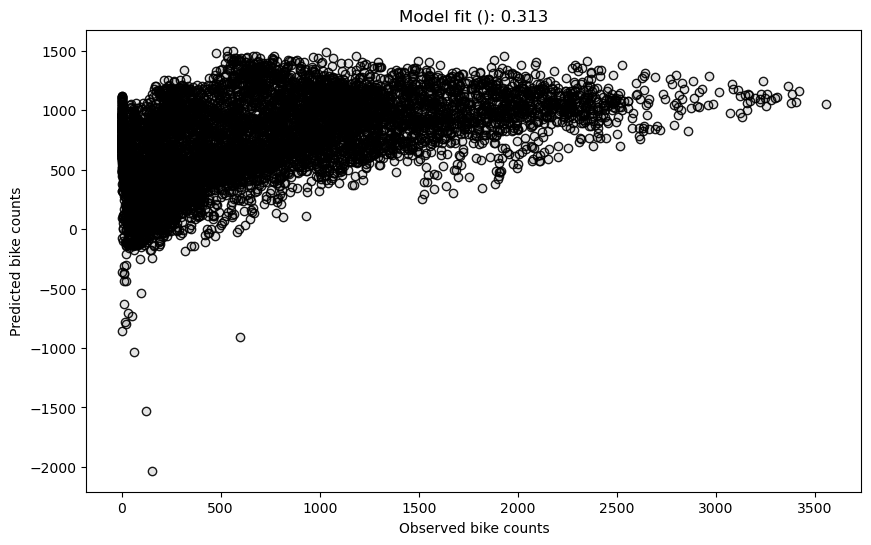

In [36]:
desmat = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)


beta = np.linalg.lstsq(desmat,y,rcond=None)
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2

# and plot
plt.figure(figsize=(10,6))
plt.plot(y,yHat,'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9))
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit (): {modelfit:.3f}')
plt.savefig('Figure_11_09.png',dpi=300)
plt.show()

### 연습 문제 11-3

In [48]:
# some random linear combination
lincombo = 4*desmat[:,0] + .4*desmat[:,1]

# Create a design matrix
desmatM = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmatM = np.append(desmatM,np.ones((desmatM.shape[0],1)),axis=1)

# augmented design matrix
desmatM = np.append(desmatM,lincombo.reshape(-1,1),axis=1)

# size and rank of the design matrix
print(f'Design matrix size: {desmatM.shape}')
print(f'Design matrix rank: {np.linalg.matrix_rank(desmatM)}')

# correlation matrix (note: nan's for intercept b/c no variance)
oSettings = np.seterr() # default error handling
np.seterr(all='ignore') # ignore warnings for correlation matrices
print(f'\nDesign matrix correlation matrix:')
print(np.round(np.corrcoef(desmatM.T),5))
np.seterr(**oSettings); # reset the error handling

Design matrix size: (8760, 4)
Design matrix rank: 3

Design matrix correlation matrix:
[[1.      0.05028     nan 0.7057 ]
 [0.05028 1.          nan 0.74309]
 [    nan     nan     nan     nan]
 [0.7057  0.74309     nan 1.     ]]


In [39]:
#A nicer way to print out the correlation matrix using pandas
pd.DataFrame(desmatM,columns=['Rain','Temp','Int','Combo']).corr()

,Rain,Temp,Int,Combo
Rain,1.000000,0.050282,NaN,0.705704
Temp,0.050282,1.000000,NaN,0.743094
Int,NaN,NaN,NaN,NaN
Combo,0.705704,0.743094,NaN,1.000000


### 연습 문제 11-4

In [53]:
gamma1=0
gamma2=0.01

X=desmatM.copy()

gamnorm1 = gamma1 * np.linalg.norm(X,'fro')**2
gamnorm2 = gamma2 * np.linalg.norm(X,'fro')**2

leftinv1 = np.linalg.inv(X.T@X + gamnorm1*np.eye(X.shape[1]))
leftinv2 = np.linalg.inv(X.T@X + gamnorm2*np.eye(X.shape[1]))

In [54]:
print(leftinv1.shape)
print(np.linalg.matrix_rank(leftinv1))
print()
print(leftinv2.shape)
print(np.linalg.matrix_rank(leftinv2))

(4, 4)
1

(4, 4)
4


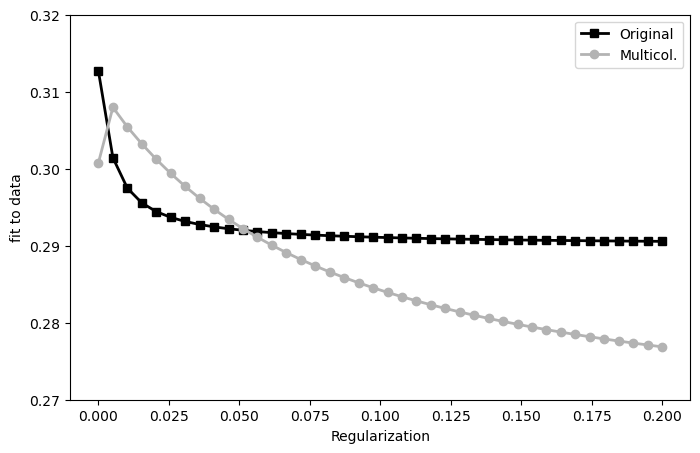

In [60]:
a= np.linspace(0,0.2,40)

r2s  = np.zeros(a.shape)
r2sM = np.zeros(a.shape)

for i in range(len(a)):

  l = a[i]*np.linalg.norm(desmat,'fro')**2

  leftinv = np.linalg.inv(desmat.T@desmat + l*np.eye(desmat.shape[1])) @ desmat.T
  
  b = leftinv @ y
  yHat = desmat@b

  r2s[i] = np.corrcoef(y.T,yHat.T)[0,1]**2

  l = a[i]*np.linalg.norm(desmatM,'fro')**2
    
  leftinv = np.linalg.inv(desmatM.T@desmatM + l*np.eye(desmatM.shape[1])) @ desmatM.T
    
  b = leftinv @ y
  yHat = desmatM@b
  r2sM[i] = np.corrcoef(y.T,yHat.T)[0,1]**2

plt.figure(figsize=(8,5))
plt.plot(a,r2s,'ks-',linewidth=2,label='Original')
plt.plot(a,r2sM,'o-',linewidth=2,label='Multicol.',color=[.7,.7,.7])
plt.xlabel('Regularization')
plt.ylabel('fit to data')
plt.ylim([0.27,0.32])
plt.legend()
plt.show()